<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://d8a-88.github.io/econ-fa19/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 12pt;"><strong>Economic Models</strong>, Fall 2019<br>
            Dr. Eric Van Dusen</p></td></tr>
</table>

# Welcome to Data 88: Data Science and Economics Connector Course!
# Week 1 - Introduction


Economics is in the world around us, and so is Data Science! It's in our every day lives. As we connect Data Science with Economics, we will be exploring real life datasets to illustrate how Economics concepts are shaped and how decisions lead to real-life impacts.

## Today's Lab

Some learning outcomes:
1. Navigate and use tools, such as Jupyter notebooks
2. Write and evaluate basic expressions in Python
3. Represent formulas and expressions in LaTeX
4. Write and evaluate functions, such as Supply and Demand, in SymPy
5. Calculus review 



Acknowledgement: prob140.org, opentextbc.ca

## 1. Intro to Jupyter Notebooks

Welcome to Jupyter notebooks, a place used to write programs, write texts, and view the results.

Each rectangle is called a *cell*. There are two types of cells: text or code. Text cells, like this one, can be edited by double-clicking on them. 

To run a cell, click the "▶| Run" button on the top menu bar or hold `shift` + `return` (or `shift` + `enter`). 

**Question 1.1.** Try editing this paragraph so it only says "Economics is fun." Then click the "run cell" ▶| button or hold down `shift` + `return`. This sentence, for example, should be deleted. Edit by double-clicking this cell.

**Question 1.2.** Other cells contain code in Python 3 language. Running a cell with code will execute all the code it contains. To run the code in a code cell, first click on that cell to activate it. It'll be highlighted with a little green or blue rectangle. Run the following cells.

In [ ]:
#Run this cell
print("Hello, World!")

In [ ]:
print("Economics is fun!")
print("I love data science!")

In [ ]:
# Run this cell
from datascience import *
import numpy as np
from sympy import *
init_printing()
import matplotlib.pyplot as plt
%matplotlib inline

## 2. LaTeX ##

A tool for presenting and formatting numeric formulas, functions, and symbols is LaTeX. To format with LaTex, place your equations and math in between dollar signs, $. 

For example, \\$f(x) = 8x\\$  gets formatted as  $f(x) = 8x$

Some other common operations:

Exponentials: \\$x^{2}\\$ gets formatted as $x^{2}$

Fractions: \\$\frac{x}{y}\\$ yields $\frac{x}{y}$

We can use LaTeX for formatting Supply and Demand curves and functions in Economics, such as $ P = 2Q + 4 $

Practice typing a few different expressions using LaTeX. 


#### Question 1


*Write your answer here, replacing this text.* Type the Pythagorean theorem a^2 + b^2 = c^2

#### Question 2


*Write your answer here, replacing this text.* Type the Euclidian distance theorem. sqrt(x^2 + y^2)

## 3. Supply and Demand ##

In economics and the world around us, supply and demand make up the fundamentals. 

One assumption we make for the law of supply and law of demand is *ceteris paribus.* When we change one factor, all other variables are held constant. 

For the supply and demand curves, we plot price P goes on the vertical Y-axis and quantity Q on the horizontal X-axis. 

Note:  It is different than how conventional math classes show the 'independent variable' price P on the Y-axis.

Let's look at a real-world example of a dataset for gasoline. 

In [ ]:
#Run this cell to load the table
Table().with_columns('Price (per gallon)', np.arange(1.00, 2.40, 0.2), 'Quantity Supplied (millions of gallons)', [500, 550, 600, 640, 680, 700, 720], 'Quantity Demanded (millions of gallons)', [800, 700, 600, 550, 500, 460, 420])

Supply refers to the amount of a good or service a producer is willing to supply for each given price. 

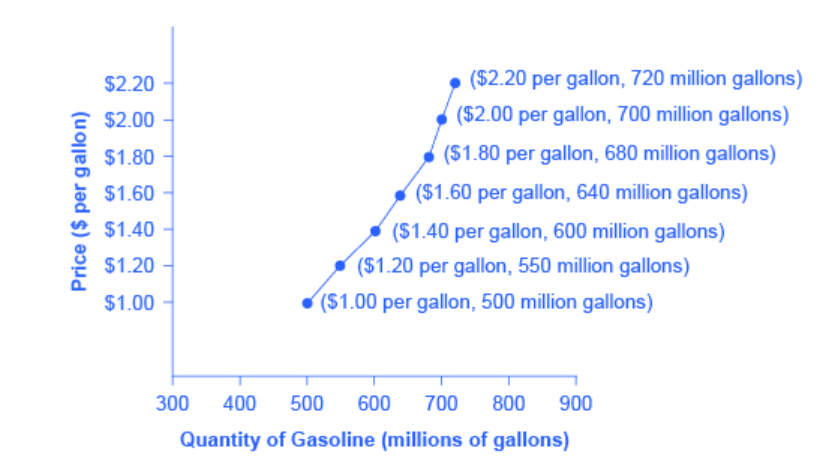


Demand is the amount of a good or service consumers are willing and able to purchase for each given price. 

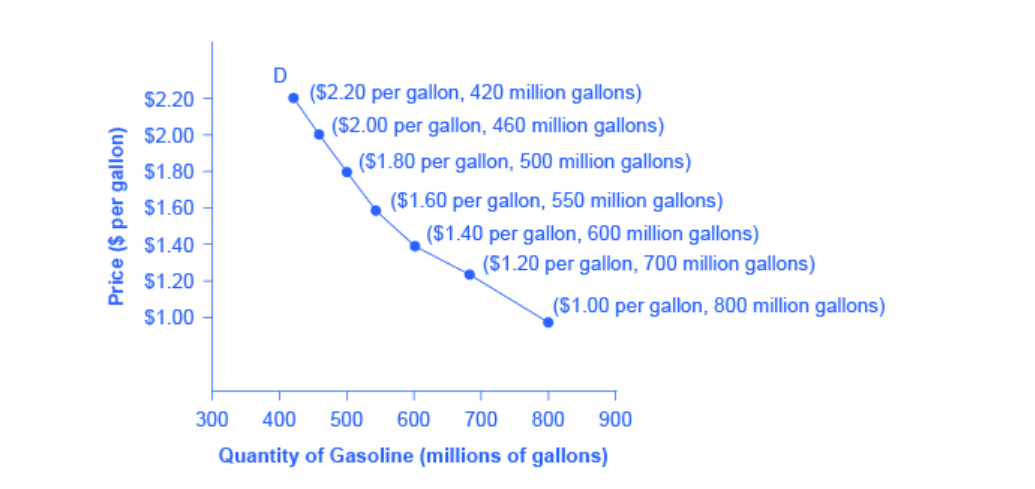

In the next section, we will be exploring SymPy to find the intersection of the supply and demand curves, which marks the equilibrium point where both the price and quantity consumers are willing and able to buy at is equal to the price and quantity producers are willing to sell at.

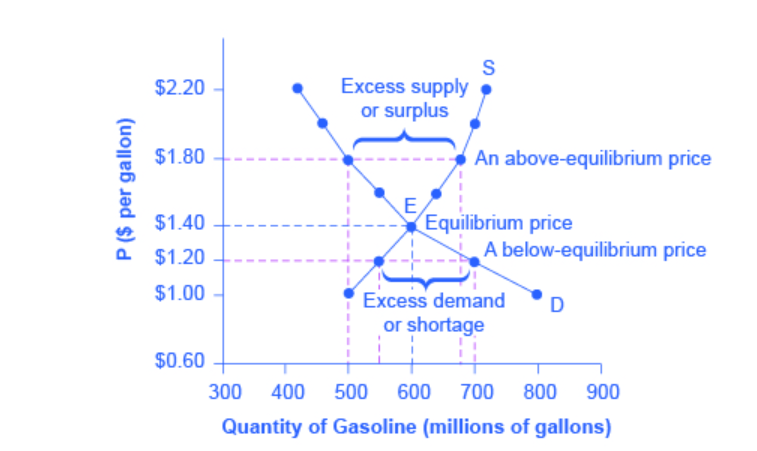

## 4. SymPy ##

Python has many tools, such as the SymPy library [https://docs.sympy.org/latest/tutorial/index.html] that we can use for expressing and evaluating formulas and functions in economics. 

Since SymPy helps with symbolic math, we start out by create a symbol using `Symbol`, which we assign to a variable name. Then, we can use the symbols for constructing symbolic expressions.

#### Example 1 ####

In [ ]:
#Run this cell

x = Symbol('x')
x

Now let's try using SymPy for creating a symbolic expression for supply and demand curves.

Let's start out with an upward sloping Supply curve, where P_S is price and Q_S is quantity suppled. Create symbols for the variables P_S and Q:

In [ ]:
P_S = Symbol('P_S')
P_S

In [ ]:
Q_S = Symbol('Q_S')
Q_S

In [ ]:
#Supply curve
P_S = 2 * Q_S - 4
P_S

Now, use the same symbols P_D and Q_D to create an expression for a downward sloping Demand curve.

In [ ]:
Q_D = Symbol('Q_D')
Q_D

In [ ]:
# Demand curve
P_D = 2 - Q_D
P_D

Given the supply and demand curve, we set the two equations equal to each other and solve for the equilibrium price and equilibrium quantity. 

In [ ]:
P_D = P_S

Using symPy, we call solve, which takes in the equation as the first argument followed by the variable we are solving for.

In [ ]:
solve(P_S, Q_S)

In [ ]:
solve(P_S, P_D)

The equilibrium price and quantity are 0 and 2, respectively. 

#### Example 2####
Let's suppose our demand function is $Quantity_{D}=-2 * Price_{D} + 10$. Using SymPy, this would be


In [ ]:
q = Symbol("q")
demand = -2*q + 10
demand

Suppose we have a supply function $Price_{S}=3 * Quantity_{S} + 1$. Using SymPy, this would be


In [ ]:
supply = 3*q + 1
supply

We will now try to find the market equilibrium. The market equilibrium is the price at which the quantity supplied and quantity demanded of a good or service is equal to each other. Hence, it is the point at which the demand and supply curves intersect. In the beginning of the workbook, we defined a function called solve which finds the x-value of a demand and supply curve's intersection. This point will be referred to as the equilibrium quantity, also known as Q*. 


In [ ]:
def plot_equation(equation, price_start, price_end, label=None):
    plot_prices = [price_start, price_end]
    plot_quantities = [equation.subs(list(equation.free_symbols)[0], c) for c in plot_prices]
    plt.plot(plot_prices, plot_quantities, label=label)
    
def plot_intercept(eq1, eq2):
    ex = solve(eq1-eq2)[0]
    why = eq1.subs(list(eq1.free_symbols)[0], ex)
    plt.scatter([ex], [why])
    return (ex, why)
    
plot_equation(demand, 0, 5)
plot_equation(supply, 0, 5)
plt.ylim(0,20)
plot_intercept(supply, demand)

## 5. Calculus Review

Let's review partial derivatives, which is simplying taking derivatives with respect to the variable specified in the partial derivative. All other variables are treated as constants. 

For example, the partial derivative, with respect to x, of 2xy is 2y.  Here, y is treated as a constant.

Ex 1) $\displaystyle\frac{\partial}{\partial y}(2xy) = 2x$

Ex 2) $\displaystyle\frac{\partial}{\partial x}(x^{4} + xy^{2} + x) = 4x^{3} + y^{2} + 1$

Use LaTex to find and display the partial derivatives.

#### Question 1
$\displaystyle\frac{\partial}{\partial x} (x^{2} + 8x)$

*Write your answer here, replacing this text.*

#### Question 2
$\displaystyle\frac{\partial}{\partial z} (5z^{6} + 10x^{2}yz^{2} + xyz + ln(z))$

*Write your answer here, replacing this text.*

Congrats! You finished the Lab 1! 